# AutoCorrelation Function (ACF) & Partial AutoCorrelation Function (PACF)

[Mastering Time-Series Analysis & Forecasting - Episode 4](https://youtu.be/TiXJ2bL0Yeg)
</br></br>
By <span style="color: purple;font-weight:bold">Tiger4Code</span>:
www.<span style="color: blue;">Youtube.com/</span><span style="color: red;">@Tiger4Code</span>


# Autocorrelation

If we are interested in examining the linear dependence between rt and its past values rt−i​, the concept of correlation is generalized to autocorrelation.

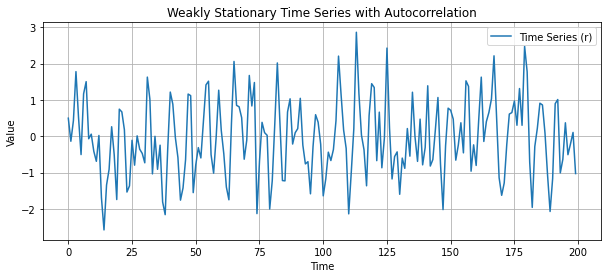

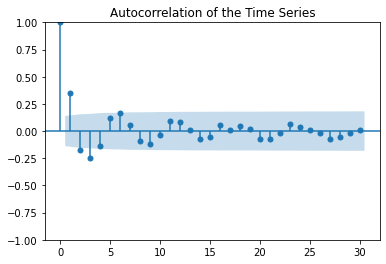

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate a weakly stationary time series
np.random.seed(42)
n = 200  # Number of observations
r = np.random.normal(0, 1, n)  # White noise (weakly stationary)

# Add some autocorrelation by including past values
for t in range(2, n):
    r[t] += 0.5 * r[t - 1] - 0.3 * r[t - 2]

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(r, label="Time Series (r)")
plt.title("Weakly Stationary Time Series with Autocorrelation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

# Plot the autocorrelation function
plot_acf(r, lags=30, title="Autocorrelation of the Time Series")
plt.show()


## Autocorrelation Function (ACF)
Example that demonstrates how to compute and plot the autocorrelation function (ACF) using the statsmodels library. This will be a good tutorial for understanding autocorrelation in time series data.

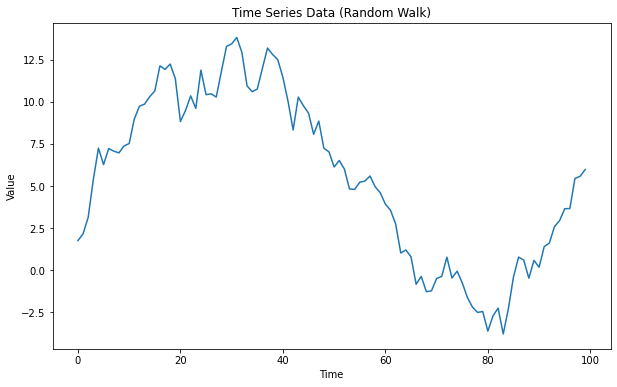

<Figure size 720x432 with 0 Axes>

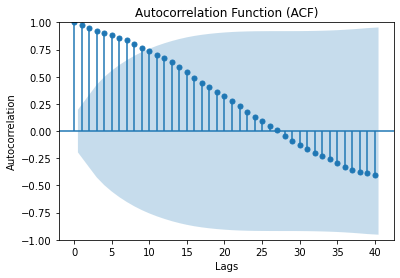

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate a sample time series data (e.g., random walk)
np.random.seed(0)  # For reproducibility
n = 100  # Length of time series
data = np.random.randn(n).cumsum()  # Cumulative sum to simulate random walk

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title("Time Series Data (Random Walk)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Plot the autocorrelation function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(data, lags=40)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


### 1. Decay Pattern (Stationary Process, e.g., Stock Returns)

In finance, the daily returns of a stock are often stationary, meaning they fluctuate around a mean without any significant long-term trend. This leads to a rapid decay in autocorrelation after a short lag.

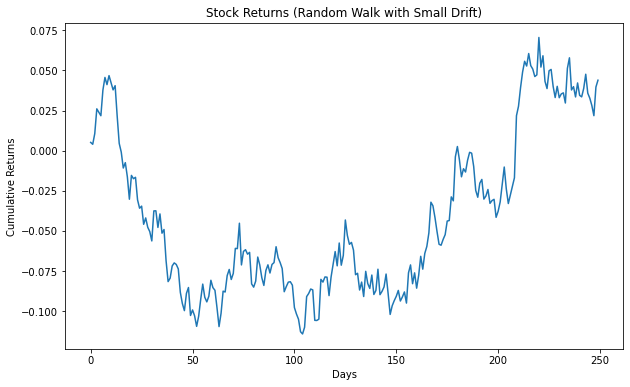

<Figure size 720x432 with 0 Axes>

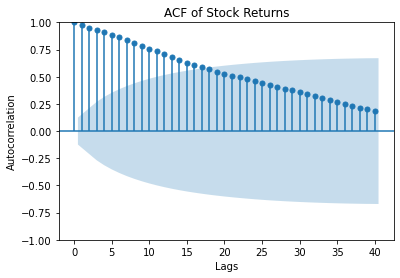

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Simulate daily returns for a stock (random walk with small drift)
np.random.seed(42)
n = 250  # Number of trading days (approximately 1 year)
drift = 0.0002  # Small daily drift
noise = np.random.normal(0, 0.01, n)  # Random daily return
stock_returns = np.cumsum(noise + drift)  # Cumulative sum to simulate stock returns

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(stock_returns)
plt.title("Stock Returns (Random Walk with Small Drift)")
plt.xlabel("Days")
plt.ylabel("Cumulative Returns")
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(stock_returns, lags=40)
plt.title("ACF of Stock Returns")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Interpretation:
- The ACF plot will show a rapid decay, indicating that the returns do not exhibit long-term dependence and are "memoryless" after a few lags, which is typical for stock returns in efficient markets.

### 2. Seasonality (Marketing Campaign Data)

In marketing, sales data often exhibit seasonal patterns. For example, if you're tracking monthly sales, you might observe peaks at specific lags, like a yearly seasonality cycle (e.g., peak sales every December).

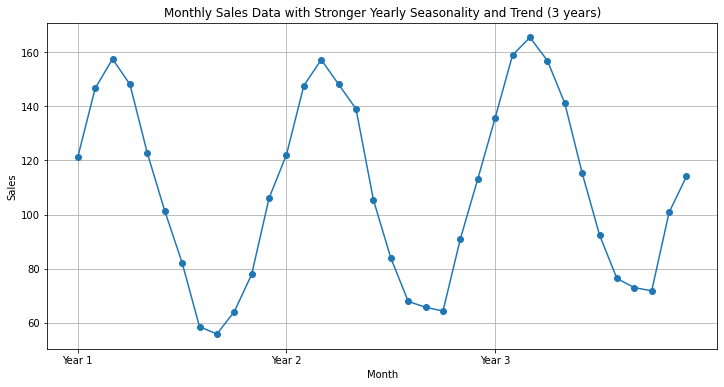

<Figure size 864x432 with 0 Axes>

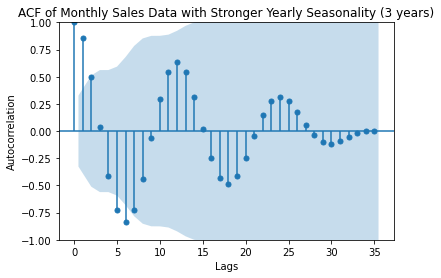

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Simulate 3 years of monthly sales data with stronger seasonality (clear yearly cycle)
months = np.arange(1, 37)  # 36 months (3 years)
seasonality = 50 * np.sin(2 * np.pi * months / 12)  # Stronger yearly sine wave
trend = np.linspace(100, 120, 36)  # Slow upward trend for 3 years
sales_data = trend + seasonality + np.random.normal(0, 3, 36)  # Sales data with seasonality and trend

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(months, sales_data, marker='o')
plt.title("Monthly Sales Data with Stronger Yearly Seasonality and Trend (3 years)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(np.arange(1, 37, 12), [f"Year {i}" for i in range(1, 4)])  # Label each year
plt.grid(True)
plt.show()

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(sales_data, lags=35)  # Calculate autocorrelation for lags 0-35
plt.title("ACF of Monthly Sales Data with Stronger Yearly Seasonality (3 years)")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Interpretation:
The ACF plot will show periodic peaks, especially at lag 12 (12 months), indicating a yearly seasonal pattern. This is common in marketing where sales might peak in specific months each year (e.g., holiday season).


### 3. Trend (Stock Prices with a Trend)

Stock prices can exhibit long-term trends due to factors like company performance, macroeconomic conditions, etc. This leads to a slowly decaying ACF because the series has a strong correlation with its past values over many periods.

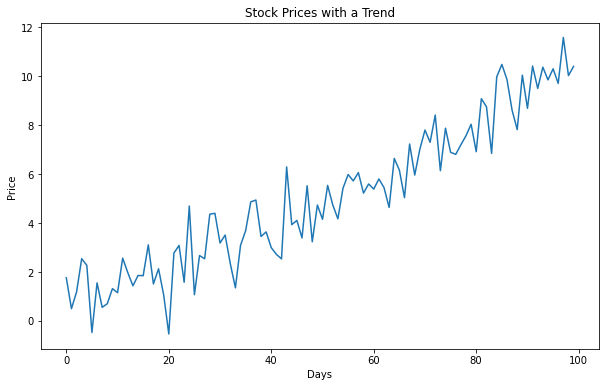

<Figure size 720x432 with 0 Axes>

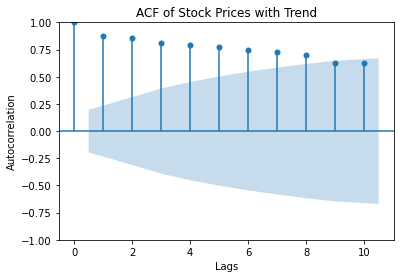

In [11]:
# Simulate stock prices with a trend (e.g., growing company stock)
np.random.seed(0)
n = 100  # Number of days
trend = np.linspace(0, 10, n)  # Increasing trend (e.g., stock growth)
noise = np.random.normal(0, 1, n)  # Random noise
stock_prices_with_trend = trend + noise  # Stock price with trend

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(stock_prices_with_trend)
plt.title("Stock Prices with a Trend")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(stock_prices_with_trend, lags=10)
plt.title("ACF of Stock Prices with Trend")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


Interpretation:
- The ACF plot will show a slowly decaying correlation, indicating a long-range dependence in the series due to the underlying trend. The autocorrelations at higher lags will remain significantly positive, suggesting the stock price is correlated with past values.

### 4. White Noise (Random Marketing Spend Data)
White noise refers to a time series where each value is independent and not related to past values. In marketing, this could represent random fluctuations in advertising spend.

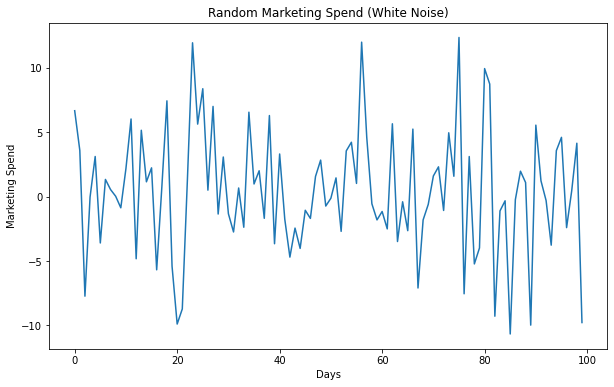

<Figure size 720x432 with 0 Axes>

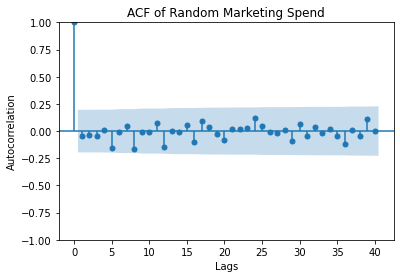

In [12]:
# Simulate random marketing spend data (white noise)
np.random.seed(10)
n = 100  # Number of observations
marketing_spend = np.random.normal(0, 5, n)  # Random noise

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(marketing_spend)
plt.title("Random Marketing Spend (White Noise)")
plt.xlabel("Days")
plt.ylabel("Marketing Spend")
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(marketing_spend, lags=40)
plt.title("ACF of Random Marketing Spend")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


### How ACF Works

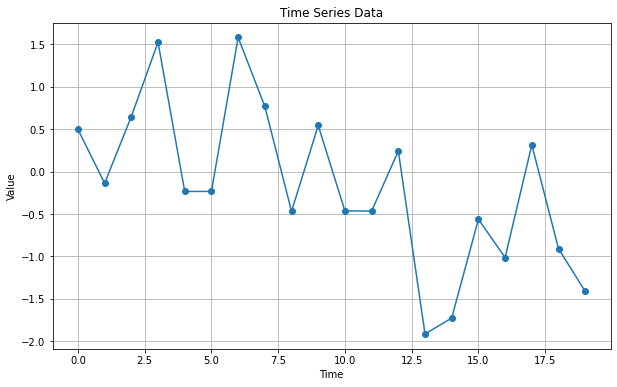

<Figure size 720x432 with 0 Axes>

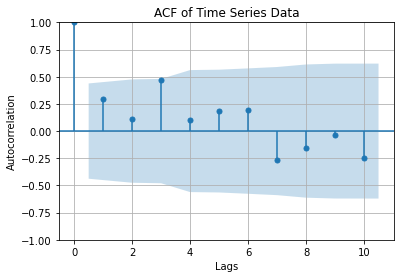

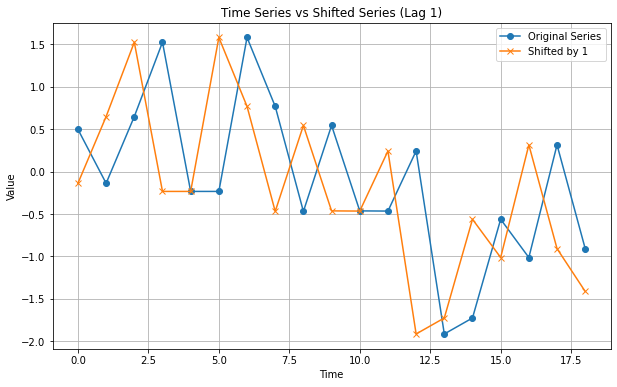

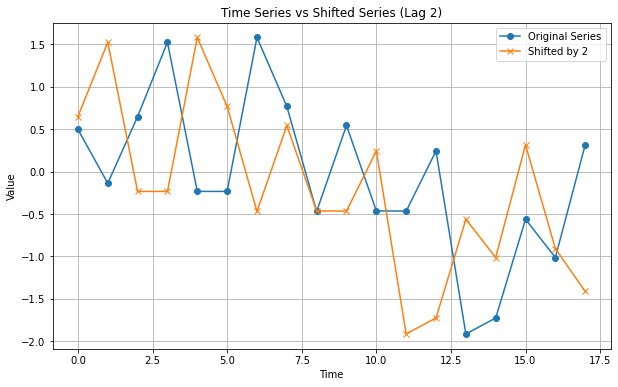

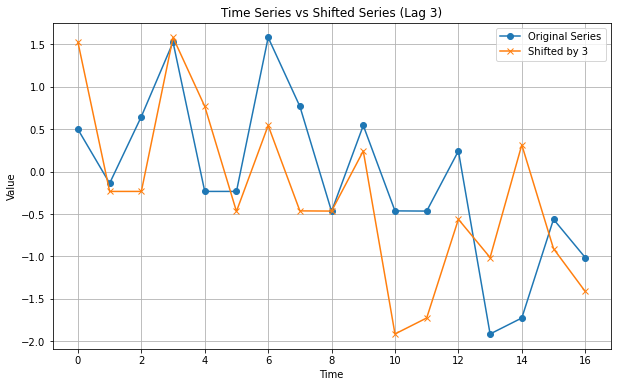

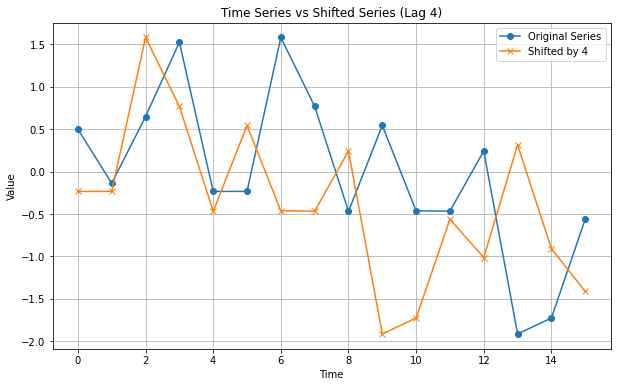

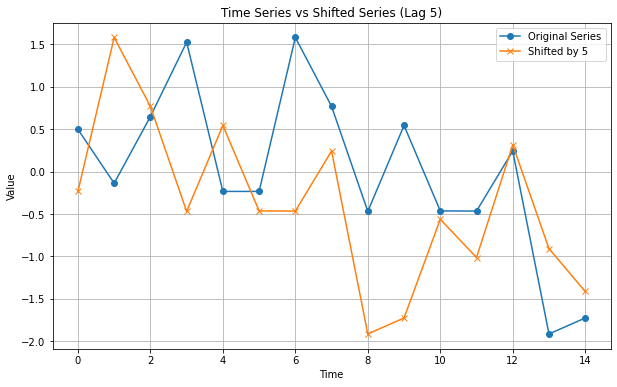

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Simulate 20 data points for time series
np.random.seed(42)
N = 20
time_series = np.random.randn(N)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series, marker='o')
plt.title("Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=10)  # Calculate ACF for lags 0 to 10
plt.title("ACF of Time Series Data")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# To illustrate the changing window size, plot the first few lags
for lag in range(1, 6):  # Showing for lag 1 to 5
    plt.figure(figsize=(10, 6))
    
    # Define the shift
    shifted_series = time_series[lag:]
    
    # Plot the original series and the shifted series for the current lag
    plt.plot(time_series[:N-lag], label="Original Series", marker='o')
    plt.plot(shifted_series, label=f"Shifted by {lag}", marker='x')
    plt.title(f"Time Series vs Shifted Series (Lag {lag})")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


# Partial ACF (PACF)

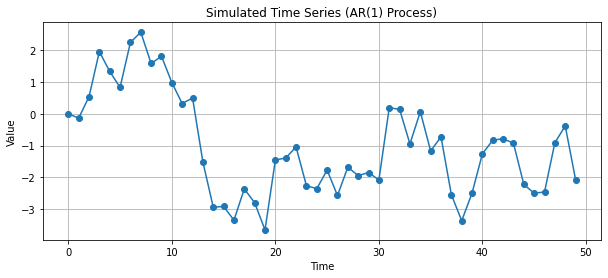

<Figure size 720x432 with 0 Axes>

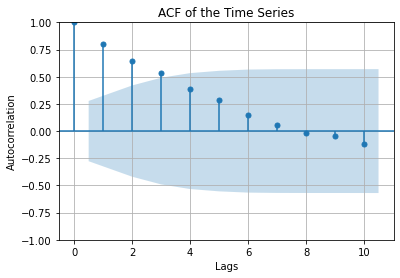

/Users/lighttiger/opt/anaconda3/envs/py38-ml/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

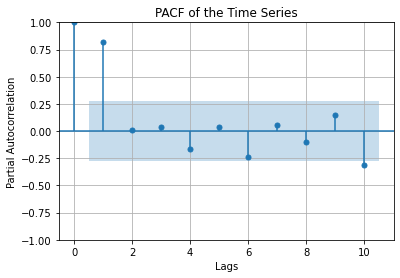

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Simulate a time series (e.g., AR(1) process)
np.random.seed(42)
N = 50
epsilon = np.random.randn(N)  # white noise
alpha = 0.8  # AR(1) coefficient
time_series = np.zeros(N)
for t in range(1, N):
    time_series[t] = alpha * time_series[t-1] + epsilon[t]

# Plot the time series
plt.figure(figsize=(10, 4))
plt.plot(time_series, marker='o')
plt.title("Simulated Time Series (AR(1) Process)")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=10)
plt.title("ACF of the Time Series")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=10)
plt.title("PACF of the Time Series")
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")
plt.grid(True)
plt.show()
